In [24]:
import numpy as np

In [2]:
# construct graph with 4-clique, cut edge, and triangle 
import numpy as np
mat1 = np.zeros((7,7))

In [1]:
edge_list = [(0,1), (0,3), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (4,6)]

In [3]:
import networkx as nx

g = nx.Graph()

g.add_nodes_from([0,1,2, 3,4,5, 6])

g.add_edges_from(edge_list) #[(1, 2), (1, 3), (2,3), (4,5), (1,4)])

In [4]:
a = nx.to_numpy_matrix(g)

In [5]:
pos = nx.spring_layout(g)

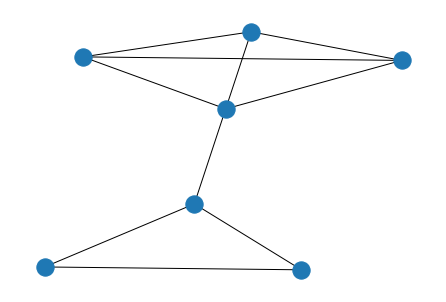

In [6]:
nx.draw(g)

In [7]:
cycle_basis = nx.cycle_basis(g, 0) 

In [8]:
cycle_basis

[[1, 2, 0], [3, 2, 0], [1, 3, 0], [5, 6, 4]]

In [18]:
test_list= cycle_basis[3]

pairs = []
for i in range(len(test_list)):
    if i == len(test_list)-1:
        pair= (test_list[i], test_list[0])
        pairs.append(pair)
        continue
    pair = (test_list[i], test_list[i+1])
    pairs.append(pair)
    

In [19]:
pairs

[(5, 6), (6, 4), (4, 5)]

In [20]:
# take the intersection of edges in cycle basis

tot_pairs = []
for group in cycle_basis:
    # extract the edges
    pairs = []
    for i in range(len(group)):
        if i== len(group)-1:
            pair = (group[i], group[0])
            pairs.append(pair)
            continue
        pair = (group[i], group[i+1])
        pairs.append(pair)
    tot_pairs.append(pairs)
    

In [21]:
tot_pairs

[[(1, 2), (2, 0), (0, 1)],
 [(3, 2), (2, 0), (0, 3)],
 [(1, 3), (3, 0), (0, 1)],
 [(5, 6), (6, 4), (4, 5)]]

In [3]:
from scipy.sparse import csgraph


In [ ]:
edge_list1 = [[0,1], [1,2]]

for e in edge_list1:
    e1 = e[0]
    e2 = e[1]
    mat1[e1, e2]=1
    mat1[e2, e1]=1
    

In [ ]:
# manually do Laplacian
n= 7

deg_mat = np.zeros((n, n))# diagonal where deg_{i} is deg of v_i
ind=0
for row in mat1:
    r_sum = sum(row)
    deg_mat[ind, ind] = r_sum
    ind = ind+1

# L = D - A (degree) minus (adjacency)
Lap_mat = deg_mat - mat1 


In [ ]:
# embedding of the graphs into space with distance given by kernel

# SVM or find boundaries

In [22]:
# path k graph code 

def pathmatrixk(m,k): # m is matrix 
    
    n=len(m)
    powersdictionary= {}
    
    new_edge_list = []
    
    prevm= m 
    powersdictionary[1]= m
    for i in range(2,k):
        prevm= np.matmul(prevm,m)
        powersdictionary[i]= prevm

    pathmatk = np.zeros((n,n))
    for kk in range(1,k):
        kpow = powersdictionary[kk]
        for i in range(0,n-1):
            for j in range(0,n-1):
                if i==j:
                    continue
                if pathmatk[i,j]==0: # check if there already exists path
                    if kpow[i,j]>0:
                        #print('kpow',kpow[i,j])
                        pathmatk[i,j]= kk
                        new_edge_list.append((i,j))
                        new_edge_list.append((j,i))
                    
    return pathmatk, new_edge_list

In [31]:
k = 4

pgraph = pathmatrixk(a,k)

In [32]:
pgraph_mat = pgraph[0]

In [33]:
pgraph_nx = nx.from_numpy_matrix(pgraph_mat)

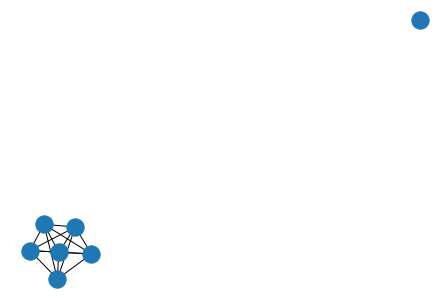

In [34]:
nx.draw(pgraph_nx)

In [27]:
# convert to nx graph
import numpy as np
A = np.array([[1, 1], [2, 1]])
G = nx.from_numpy_matrix(A)

In [39]:
# line graph code

def findinE(E, r,c):
    for e in E:
        if e[0]==r and e[1]==c:
            return 1
        if e[0]==c and e[0]==r:
            return 1
    return 0

def linegraph(G):
    hashnewVertexoldEdge = {}
    newVertexSet =[]
    ine= 0
    E =[] # edges 
    s = len(G)
    print("s is ", s)
    for r in range(0,s):
        for c in range(0,s):
            if G[r,c]==1 and findinE(E, r,c) ==0:

                E.append([r,c]) # add to edges 
                E.append([c,r])
                newVertexSet.append(ine)
                hashnewVertexoldEdge[ine] = [r,c]
                ine=ine+1
    print("ine is ", ine)
    # num edge is num 1's divided by 2 
    #ine = s
    s = ine
    newadjmat = np.zeros((ine,ine))
    new_edge_list = [] # Jan 7, 2022 
    #edges = non empty intersection
    for v in newVertexSet:
        for vv2 in newVertexSet:
            e1 = hashnewVertexoldEdge[v]
            e2 = hashnewVertexoldEdge[vv2]
            # check for intersection
            v1 = e1[0]
            v2 = e1[1]
            v3 = e2[0]
            v4 = e2[1]
            if v1 == v3 or v1 ==v4:
                # add edge
                newadjmat[v,vv2] =1
                newadjmat[vv2,v] =1
                new_edge_list.append((v,vv2))
                new_edge_list.append((vv2, v))
                if v==vv2: # change diagonal to 0
                    newadjmat[v,vv2] = 0
            if v2 ==v3 or v2==v4:
                # add edge 
                newadjmat[v,vv2]=1
                newadjmat[vv2,v]=1
                new_edge_list.append((v,vv2))
                new_edge_list.append((vv2,v))
                if v==vv2:
                    newadjmat[v,vv2] = 0
    return newadjmat, hashnewVertexoldEdge, new_edge_list


In [40]:
# try applying line graph twice ? so vertex -> edge -> vertex
line_graph = linegraph(a)


s is  7
ine is  10


In [ ]:
#https://jmlr.org/papers/volume21/18-370/18-370.pdf

clf = SVC(kernel=’precomputed’).fit(K_train, y_train)
y_pred = clf.predict(K_test)